In [15]:
#Imports:
import numpy as np
import pandas as pd
import scipy.stats as stats
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet



sns.set_style('whitegrid')

%config InlineBackend.figure_format = 'retina'
%matplotlib inline

In [3]:
sample = pd.read_csv('sample_sub_reg.csv')
test = pd.read_csv('test.csv')
train = pd.read_csv('train.csv')

In [4]:
pd.to_numeric(train['Lot Frontage'])

0        NaN
1       43.0
2       68.0
3       73.0
4       82.0
        ... 
2046    79.0
2047     NaN
2048    57.0
2049    80.0
2050    60.0
Name: Lot Frontage, Length: 2051, dtype: float64

In [5]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2051 entries, 0 to 2050
Data columns (total 81 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Id               2051 non-null   int64  
 1   PID              2051 non-null   int64  
 2   MS SubClass      2051 non-null   int64  
 3   MS Zoning        2051 non-null   object 
 4   Lot Frontage     1721 non-null   float64
 5   Lot Area         2051 non-null   int64  
 6   Street           2051 non-null   object 
 7   Alley            140 non-null    object 
 8   Lot Shape        2051 non-null   object 
 9   Land Contour     2051 non-null   object 
 10  Utilities        2051 non-null   object 
 11  Lot Config       2051 non-null   object 
 12  Land Slope       2051 non-null   object 
 13  Neighborhood     2051 non-null   object 
 14  Condition 1      2051 non-null   object 
 15  Condition 2      2051 non-null   object 
 16  Bldg Type        2051 non-null   object 
 17  House Style   

In [7]:
[col for i,col  in enumerate(train) if train[col].isnull().sum()>1025]



['Alley', 'Pool QC', 'Fence', 'Misc Feature']

In [8]:
[col for i,col  in enumerate(test) if train[col].isnull().sum()>439]


['Alley', 'Fireplace Qu', 'Pool QC', 'Fence', 'Misc Feature']

In [ ]:
train

35  BsmtFin SF 1     2050 non-null   float64
48  Bsmt Full Bath   2049 non-null   float64
49  Bsmt Half Bath   2049 non-null   float64
62  Garage Cars      2050 non-null   float64
63  Garage Area      2050 non-null   float64
for test

col in train with <50% non NaN
7   Alley            140 non-null    object 
73  Pool QC          9 non-null      object 
74  Fence            400 non-null    object 
75  Misc Feature     65 non-null     object 



col in test with <50% non NaN
7   Alley            58 non-null     object 
73  Pool QC          4 non-null      object 
74  Fence            172 non-null    object 
75  Misc Feature     41 non-null     object 


In [13]:
[col for i,col in enumerate(train) if train[col].isnull().sum()>=1]
#those with no NA category values
#Lot Frontage, Mas Vnr Area, BsmtFin SF 1, BsmtFin SF 2, Bsmt Unf SF, Total Bsmt SF, Bsmt Full Bath, Bsmt Half Bath
#Garage Yr Blt(*impt), Garage Cars, Garage Area, 

['Lot Frontage',
 'Alley',
 'Mas Vnr Type',
 'Mas Vnr Area',
 'Bsmt Qual',
 'Bsmt Cond',
 'Bsmt Exposure',
 'BsmtFin Type 1',
 'BsmtFin SF 1',
 'BsmtFin Type 2',
 'BsmtFin SF 2',
 'Bsmt Unf SF',
 'Total Bsmt SF',
 'Bsmt Full Bath',
 'Bsmt Half Bath',
 'Fireplace Qu',
 'Garage Type',
 'Garage Yr Blt',
 'Garage Finish',
 'Garage Cars',
 'Garage Area',
 'Garage Qual',
 'Garage Cond',
 'Pool QC',
 'Fence',
 'Misc Feature']

In [14]:
train['Garage Yr Blt'].isnull().sum()

114

In [37]:
train['Wood Deck SF'].unique()

array([   0,  100,  335,  105,  169,  138,  212,  243,  483,  264,  416,
        474,  208,  104,  256,  736,  216,  303,  431,  200,  379,  168,
        132,  496,  280,  158,  142,   49,  418,  228,  261,  312,  225,
        140,  227,  203,  307,  214,  125,  153,   88,  230,   50,  276,
        144,  421,  187,  122,   52,  156,  204,  344,  240,  160,  193,
        114,  275,   12,  120,  328,  108,  182,   28,  178,   60,  250,
         38,  324,  646,  176,  248,  112,  306,  143,  302,  257,  146,
        409,  224,  232,  192,  136,  441,   48,  180,  221,  263,   81,
        134,  164,  268,  194,  191,   32,  161,   96,  210,  173,   90,
        106,  172,  393,   63,  196,  246,  288,  385,  237,  205,  188,
        242,   30,   54,  439,  209,   22,  236,  282,   24,   86,  300,
        384,  148,  147,  365,  238,  201,  370,  327,  521,  184,  298,
        315,  371,  128,  211,  218,  270,  390,  133,  135,  206,  342,
        262,  329,   94,  319,  126,  530,  190,   

In [17]:
[col for i,col in enumerate(test) if train[col].isnull().sum()>=1]

['Lot Frontage',
 'Alley',
 'Mas Vnr Type',
 'Mas Vnr Area',
 'Bsmt Qual',
 'Bsmt Cond',
 'Bsmt Exposure',
 'BsmtFin Type 1',
 'BsmtFin SF 1',
 'BsmtFin Type 2',
 'BsmtFin SF 2',
 'Bsmt Unf SF',
 'Total Bsmt SF',
 'Bsmt Full Bath',
 'Bsmt Half Bath',
 'Fireplace Qu',
 'Garage Type',
 'Garage Yr Blt',
 'Garage Finish',
 'Garage Cars',
 'Garage Area',
 'Garage Qual',
 'Garage Cond',
 'Pool QC',
 'Fence',
 'Misc Feature']

In [18]:
#see which train columns have more than 50% of its entries null
[col for i,col in enumerate(train) if (train[col].isnull().sum())>1025] 

['Alley', 'Pool QC', 'Fence', 'Misc Feature']

In [19]:
#see which test columns have more than 50% of its entries null
[col for i,col in enumerate(test) if (test[col].isnull().sum())>439] 

['Alley', 'Pool QC', 'Fence', 'Misc Feature']

In [28]:
train['Garage Yr Blt'].isnull().sum()

114

In [19]:
testingval = set(train['Kitchen Qual'].unique()) - set(test['Kitchen Qual'].unique())

In [20]:
testingval

set()

(columns in train that need to change DTYPE)
lot_frontage	float, mas_vnr_area	float, bsmtfin_sf_1	float,	bsmtfin_sf_2	float, bsmt_unf_sf	float	total_bsmt_sf	float, bsmt_full_bath	float, bsmt_half_bath	float, garage_yr_blt	float, garage_cars	float,	
garage_area	float,

(columns in test that need to change DTYPE)
lot_frontage	float, mas_vnr_area	float, bsmtfin_sf_2	float, bsmt_unf_sf	float, total_bsmt_sf	float, garage_yr_blt	float,

columns to be changed to object:
id, pid, ms_subclass, ms_zoning, street, alley, lot_shape ,land_contour,utilities,lot_config,land_slope,	
neighborhood ,condition_1 ,condition_2 ,bldg_type ,house_style,overall_qual,overall_cond,year_built,year_remod/add,	
roof_style,roof_matl,exterior_1st,exterior_2nd,mas_vnr_type,exter_qual,exter_cond,foundation,bsmt_qual,bsmt_cond,	bsmt_exposure,bsmtfin_type_1,bsmtfin_type_2,heating,heating_qc,central_air,electrical,kitchen_qual,functional,
fireplace_qu,garage_type,garage_yr_blt,garage_finish,garage_qual,garage_cond,paved_drive,pool_qc,fence,misc_feature,
mo_sold,yr_sold,sale_type


columns to be changed to float:
lot_frontage, lot_area, mas_vnr_area, bsmtfin_sf_1, bsmtfin_sf_2,bsmt_unf_sf, total_bsmt_sf, 1st_flr_sf,
2nd_flr_sf, low_qual_fin_sf, gr_liv_area, garage_cars, garage_area, wood_deck_sf, open_porch_sf, enclosed_porch,
3ssn_porch, screen_porch, pool_area, misc_val, saleprice

columns to be changed to int:
bsmt_full_bath	float	Basement full bathrooms
bsmt_half_bath	float	Basement half bathrooms
full_bath	int	Full bathrooms above grade
half_bath	int	Half baths above grade
bedroom_abvgr	int	Number of bedrooms above basement level
kitchen_abvgr	int	Number of kitchens
totrms_abvgrd	int	Total rooms above grade (does not include bathrooms)
fireplaces	int	Number of fireplaces

|Column|Type|Description| 
|:-:|:-:|:-|
|id|int|**ID**|
|pid|int|**Property ID Number**|
|ms_subclass|int|**The building class** <br> 20 : 1-STORY 1946 & NEWER ALL STYLES <br>30 : 1-STORY 1945 & OLDER<br>40 : 1-STORY W/FINISHED ATTIC ALL AGES<br>45 : 1-1/2 STORY - UNFINISHED ALL AGES<br>50 : 1-1/2 STORY FINISHED ALL AGES<br>60 : 2-STORY 1946 & NEWER<br>70 : 2-STORY 1945 & OLDER<br>75 : 2-1/2 STORY ALL AGES<br>80 : SPLIT OR MULTI-LEVEL<br>85 : SPLIT FOYER<br>90 : DUPLEX - ALL STYLES AND AGES<br>120 : 1-STORY PUD (Planned Unit Development) - 1946 & NEWER<br>150 : 1-1/2 STORY PUD - ALL AGES<br>160 : 2-STORY PUD - 1946 & NEWER<br>180 : PUD - MULTILEVEL - INCL SPLIT LEV/FOYER<br>190 : 2 FAMILY CONVERSION - ALL STYLES AND AGES|
|ms_zoning|object|**Identifies the general zoning classification of the sale.**<br>A : Agriculture<br>C : Commercial<br>FV : Floating Village Residential<br>I : Industrial<br>RH : Residential High Density<br>RL : Residential Low Density<br>RP : Residential Low Density Park<br>RM : Residential Medium Density|
|lot_frontage|float|**Linear feet of street connected to property**|
|lot_area|int|**Lot size in square feet**|
|street|object|**Type of road access to property**<br>Grvl : Gravel<br>Pave : Paved|
|alley|object|**Type of alley access to property**<br>Grvl : Gravel<br>Pave : Paved<br>NA : No alley access|
|lot_shape|object|**LotShape: General shape of property**<br>Reg : Regular<br>IR1 : Slightly irregular<br>IR2 : Moderately Irregular<br>IR3 : Irregular|
|land_contour|object|**LandContour: Flatness of the property**<br>Lvl : Near Flat/Level<br>Bnk : Banked - Quick and significant rise from street grade to building<br>HLS : Hillside - Significant slope from side to side<br>Low Depression|
|utilities|object|**Type of utilities available**<br>AllPub : All public Utilities (E,G,W,& S)<br>NoSewr : Electricity, Gas, and Water (Septic Tank)<br>NoSeWa : Electricity and Gas Only<br>ELO : Electricity only|
|lot_config|object|**Lot configuration**<br>Inside : Inside lot<br>Corner : Corner lot<br>CulDSac : Cul-de-sac<br>FR2 : Frontage on 2 sides of property<br>FR3 : Frontage on 3 sides of property|
|land_slope|object|**Slope of property**<br>Gtl : Gentle slope<br>Mod : Moderate Slope<br>Sev : Severe Slope|
|neighborhood|object|**Physical locations within Ames city limits**<br>Blmngtn : Bloomington Heights<br>Blueste : Bluestem<br>BrDale : Briardale<br>BrkSide : Brookside<br>ClearCr : Clear Creek<br>CollgCr : College Creek<br>Crawfor : Crawford<br>Edwards : Edwards<br>Gilbert : Gilbert<br>IDOTRR : Iowa DOT and Rail Road<br>Meadow : Meadow Village<br>Mitchel : Mitchell<br>Names : North Ames<br>NoRidge : Northridge<br>NPkVill : Northpark Villa<br>NridgHt : Northridge Heights<br>NWAmes : Northwest Ames<br>OldTown : Old Town<br>SWISU : South & West of Iowa State University<br>Sawyer : Sawyer<br>SawyerW : Sawyer West<br>Somerst : Somerset<br>StoneBr : Stone Brook<br>Timber : Timberland<br>Veenker : Veenker|
|condition_1|object|**Proximity to main road or railroad**<br>Artery : Adjacent to arterial street<br>Feedr : Adjacent to feeder street<br>Norm : Normal<br>RRNn : Within 200' of North-South Railroad<br>RRAn : Adjacent to North-South Railroad<br>PosN : Near positive off-site feature--park, greenbelt, etc.<br>PosA : Adjacent to postive off-site feature<br>RRNe : Within 200' of East-West Railroad<br>RRAe : Adjacent to East-West Railroad|
|condition_2|object|**Proximity to main road or railroad (if a second is present)**<br>Artery : Adjacent to arterial street<br>Feedr : Adjacent to feeder street<br>Norm : Normal<br>RRNn : Within 200' of North-South Railroad<br>RRAn : Adjacent to North-South Railroad<br>PosN : Near positive off-site feature--park, greenbelt, etc.<br>PosA : Adjacent to postive off-site feature<br>RRNe : Within 200' of East-West Railroad<br>RRAe : Adjacent to East-West Railroad|
|bldg_type|object|**Type of dwelling**<br>1Fam : Single-family Detached<br>2FmCon : Two-family Conversion; originally built as one-family dwelling<br>Duplx : Duplex<br>TwnhsE : Townhouse End Unit<br>TwnhsI : Townhouse Inside Unit|
|house_style|object|**Style of dwelling**<br>1Story : One story<br>1.5Fin : One and one-half story: 2nd level finished<br>1.5Unf : One and one-half story: 2nd level unfinished<br>2Story : Two story<br>2.5Fin : Two and one-half story: 2nd level finished<br>2.5Unf : Two and one-half story: 2nd level unfinished<br>SFoyer : Split Foyer<br>SLvl : Split Level|
|overall_qual|int|**Overall material and finish quality**<br>10 : Very Excellent<br>9 : Excellent<br>8 : Very Good<br>7 : Good<br>6 : Above Average<br>5 : Average<br>4 : Below Average<br>3 : Fair<br>2 : Poor<br>1 : Very Poor|
|overall_cond|int|**Overall condition rating**<br>10 : Very Excellent<br>9 : Excellent<br>8 : Very Good<br>7 : Good<br>6 : Above Average<br>5 : Average<br>4 : Below Average<br>3 : Fair<br>2 : Poor<br>1 : Very Poor|
|year_built|int|**Original construction date**|
|year_remod/add|int|**Remodel date (same as construction date if no remodeling or additions)**|
|roof_style|object|**Type of roof**<br>Flat : Flat<br>Gable : Gable<br>Gambrel : Gabrel (Barn)<br>Hip : Hip<br>Mansard : Mansard<br>Shed : Shed|
|roof_matl|object|**Roof material**<br>ClyTile : Clay or Tile<br>CompShg : Standard (Composite) Shingle<br>Membran : Membrane<br>Metal : Metal<br>Roll : Roll<br>Tar&Grv : Gravel & Tar<br>WdShake : Wood Shakes<br>WdShngl : Wood Shingles|
|exterior_1st|object|**Exterior covering on house**<br>AsbShng : Asbestos Shingles<br>AsphShn : Asphalt Shingles<br>BrkComm : Brick Common<br>BrkFace : Brick Face<br>CBlock : Cinder Block<br>CemntBd : Cement Board<br>HdBoard : Hard Board<br>ImStucc : Imitation Stucco<br>MetalSd : Metal Siding<br>Other : Other<br>Plywood : Plywood<br>PreCast : PreCast<br>Stone : Stone<br>Stucco : Stucco<br>VinylSd : Vinyl Siding<br>Wd Sdng : Wood Siding<br>WdShing : Wood Shingles|
|exterior_2nd|object|**Exterior covering on house (if more than one material)**<br>AsbShng : Asbestos Shingles<br>AsphShn : Asphalt Shingles<br>BrkComm : Brick Common<br>BrkFace : Brick Face<br>CBlock : Cinder Block<br>CemntBd : Cement Board<br>HdBoard : Hard Board<br>ImStucc : Imitation Stucco<br>MetalSd : Metal Siding<br>Other : Other<br>Plywood : Plywood<br>PreCast : PreCast<br>Stone : Stone<br>Stucco : Stucco<br>VinylSd : Vinyl Siding<br>Wd Sdng : Wood Siding<br>WdShing : Wood Shingles|
|mas_vnr_type|object|**Masonry veneer type**<br>BrkCmn : Brick Common<br>BrkFace : Brick Face<br>Block : Cinder Block<br>None : None<br>Stone : Stone|
|mas_vnr_area|float|**Masonry veneer area in square feet**|
|exter_qual|object|**Exterior material quality**<br>Ex : Excellent<br>Gd : Good<br>TA : Average/Typical<br>Fa : Fair<br>Po : Poor|
|exter_cond|object|**Present condition of the material on the exterior**<br>Ex : Excellent<br>Gd : Good<br>TA : Average/Typical<br>Fa : Fair<br>Po : Poor|
|foundation|object|**Type of foundation**<br>BrkTil : Brick & Tile<br>CBlock : Cinder Block<br>PConc : Poured Contrete<br>Slab : Slab<br>Stone : Stone<br>Wood : Wood|
|bsmt_qual|object|**Height of the basement**<br>Ex : Excellent (100+ inches)<br>Gd : Good (90-99 inches)<br>TA : Typical (80-89 inches)<br>Fa : Fair (70-79 inches)<br>Po : Poor (<70 inches)<br>NA : No Basement|
|bsmt_cond|object|General condition of the basement<br>Ex : Excellent<br>Gd : Good<br>TA : Typical - slight dampness allowed<br>Fa : Fair - dampness or some cracking or settling<br>Po : Poor - Severe cracking, settling, or wetness<br>NA : No Basement|
|bsmt_exposure|object|**Walkout or garden level basement walls**<br>Gd : Good Exposure<br>Av : Average Exposure (split levels or foyers typically score average or above)<br>Mn : Mimimum Exposure<br>No : No Exposure<br>NA : No Basement|
|bsmtfin_type_1|object|**Quality of basement finished area**<br>GLQ : Good Living Quarters<br>ALQ : Average Living Quarters<br>BLQ : Below Average Living Quarters<br>Rec : Average Rec Room<br>LwQ : Low Quality<br>Unf : Unfinshed<br>NA : No Basement|
|bsmtfin_sf_1|float|**Type 1 finished square feet**|
|bsmtfin_type_2|object|**Quality of second finished area (if present)**<br>GLQ : Good Living Quarters<br>ALQ : Average Living Quarters<br>BLQ : Below Average Living Quarters<br>Rec : Average Rec Room<br>LwQ : Low Quality<br>Unf : Unfinshed<br>NA : No Basement|
|bsmtfin_sf_2|float|**Type 2 finished square feet**|
|bsmt_unf_sf|float|**Unfinished square feet of basement area**|
|total_bsmt_sf|float|**Total square feet of basement area**|
|heating|object|**Type of heating**<br>Floor : Floor Furnace<br>GasA : Gas forced warm air furnace<br>GasW : Gas hot water or steam heat<br>Grav : Gravity furnace<br>OthW : Hot water or steam heat other than gas<br>Wall : Wall furnace|
|heating_qc|object|**Heating quality and condition**<br>Ex : Excellent<br>Gd : Good<br>TA : Average/Typical<br>Fa : Fair<br>Po : Poor|
|central_air|object|**Central air conditioning**<br>N : No<br>Y : Yes|
|electrical|object|**Electrical system**<br>SBrkr : Standard Circuit Breakers & Romex<br>FuseA : Fuse Box over 60 AMP and all Romex wiring (Average)<br>FuseF : 60 AMP Fuse Box and mostly Romex wiring (Fair)<br>FuseP : 60 AMP Fuse Box and mostly knob & tube wiring (poor)<br>Mix : Mixed|
|1st_flr_sf|int|**First Floor square feet**|
|2nd_flr_sf|int|**Second floor square feet**|
|low_qual_fin_sf|int|**Low quality finished square feet (all floors)**|
|gr_liv_area|int|**Above grade (ground) living area square feet**|
|bsmt_full_bath|float|**Basement full bathrooms**|
|bsmt_half_bath|float|**Basement half bathrooms**|
|full_bath|int|**Full bathrooms above grade**|
|half_bath|int|**Half baths above grade**|
|bedroom_abvgr|int|**Number of bedrooms above basement level**|
|kitchen_abvgr|int|**Number of kitchens**|
|kitchen_qual|object|**Kitchen quality**<br>Ex : Excellent<br>Gd : Good<br>TA : Typical/Average<br>Fa : Fair<br>Po : Poor|
|totrms_abvgrd|int|**Total rooms above grade (does not include bathrooms)**|
|functional|object|**Home functionality rating**<br>Typ : Typical Functionality<br>Min1 : Minor Deductions 1<br>Min2 : Minor Deductions 2<br>Mod : Moderate Deductions<br>Maj1 : Major Deductions 1<br>Maj2 : Major Deductions 2<br>Sev : Severely Damaged<br>Sal : Salvage only|
|fireplaces|int|**Number of fireplaces**|
|fireplace_qu|object|**Fireplace quality**<br>Ex : Excellent - Exceptional Masonry Fireplace<br>Gd : Good - Masonry Fireplace in main level<br>TA : Average - Prefabricated Fireplace in main living area or Masonry Fireplace in basement<br>Fa : Fair - Prefabricated Fireplace in basement<br>Po : Poor - Ben Franklin Stove<br>NA : No Fireplace|
|garage_type|object|**Garage location**<br>2Types : More than one type of garage<br>Attchd : Attached to home<br>Basment : Basement Garage<br>BuiltIn : Built-In (Garage part of house - typically has room above garage)<br>CarPort : Car Port<br>Detchd : Detached from home<br>NA : No Garage|
|garage_yr_blt|float|**Year garage was built**|
|garage_finish|object|**Interior finish of the garage**<br>Fin : Finished<br>RFn : Rough Finished<br>Unf : Unfinished<br>NA : No Garage|
|garage_cars|float|**Size of garage in car capacity**|
|garage_area|float|**Size of garage in square feet**|
|garage_qual|object|**Garage quality**<br>Ex : Excellent<br>Gd : Good<br>TA : Typical/Average<br>Fa : Fair<br>Po : Poor<br>NA : No Garage|
|garage_cond|object|**Garage condition**<br>Ex : Excellent<br>Gd : Good<br>TA : Typical/Average<br>Fa : Fair<br>Po : Poor<br>NA : No Garage|
|paved_drive|object|**Paved driveway**<br>Y : Paved<br>P : Partial Pavement<br>N : Dirt/Gravel|
|wood_deck_sf|int|**Wood deck area in square feet**|
|open_porch_sf|int|**Open porch area in square feet**|
|enclosed_porch|int|**Enclosed porch area in square feet**|
|3ssn_porch|int|**Three season porch area in square feet**|
|screen_porch|int|**Screen porch area in square feet**|
|pool_area|int|**Pool area in square feet**|
|pool_qc|object|**Pool quality**<br>Ex : Excellent<br>Gd : Good<br>TA : Average/Typical<br>Fa : Fair<br>NA : No Pool|
|fence|object|**Fence quality**<br>GdPrv : Good Privacy<br>MnPrv : Minimum Privacy<br>GdWo : Good Wood<br>MnWw : Minimum Wood/Wire<br>NA : No Fence|
|misc_feature|object|**Miscellaneous feature not covered in other categories**<br>Elev : Elevator<br>Gar2 : 2nd Garage (if not described in garage section)<br>Othr : Other<br>Shed : Shed (over 100 SF)<br>TenC : Tennis Court<br>NA : None|
|misc_val|int|**$Value of miscellaneous feature**|
|mo_sold|int|**Month Sold**|
|yr_sold|int|**Year Sold**|
|sale_type|object|**Type of sale**<br>WD : Warranty Deed - Conventional<br>CWD : Warranty Deed - Cash<br>VWD : Warranty Deed - VA Loan<br>New : Home just constructed and sold<br>COD : Court Officer Deed/Estate<br>Con : Contract 15\% Down payment regular terms<br>ConLw : Contract Low Down payment and low interest<br>ConLI : Contract Low Interest<br>ConLD : Contract Low Down<br>Oth : Other|
|saleprice|int|**Property's sale price in dollars**|

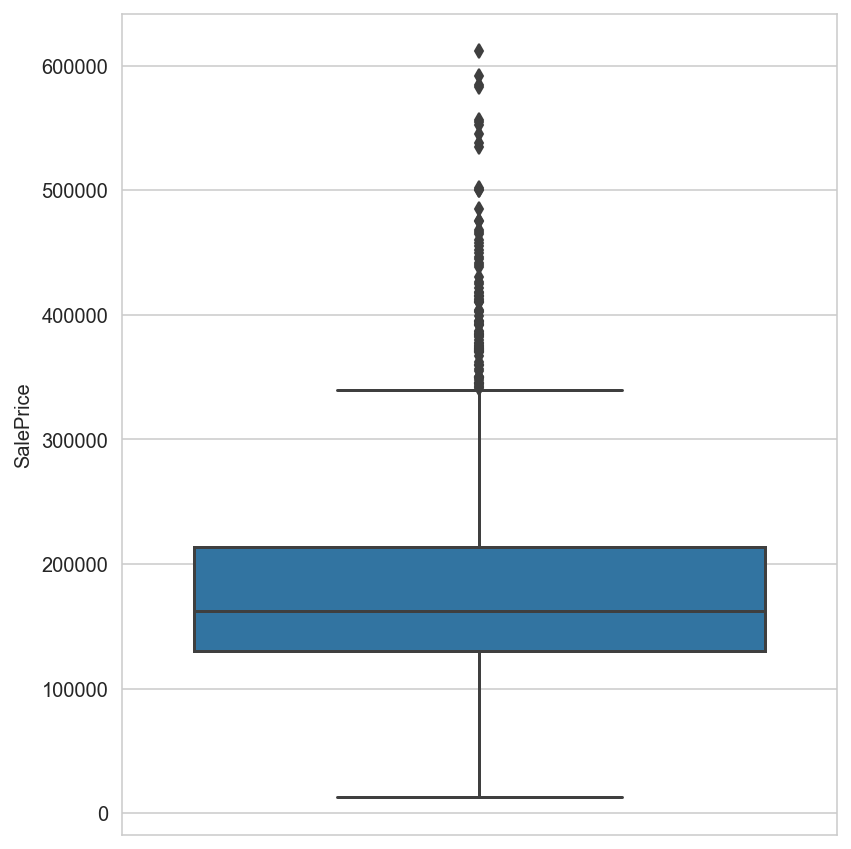

In [14]:
fig = plt.figure(figsize=(6,6))

sns.boxplot(train['SalePrice'],orient = 'v');

plt.tight_layout()

In [ ]:
'overall_qual', 'overall_cond','lot_shape','utilities','land_slope','exter_qual','exter_cond',
'bsmt_qual','bsmt_cond','bsmt_exposure','bsmtfin_type_1','heating_qc','electrical','kitchen_qual',
'functional','fireplace_qu','garage_finish','garage_qual','garage_cond','paved_drive','pool_qc','fence'